# <a id="Import"></a>
# <p style="background-color: #FFC0CB; font-family: 'Copperplate'; color:#4B0082; font-size:140%; text-align:center; border-radius:1000px 10px;">About Project and Data</p> 

## Project Title: Sentiment Sleuth: Cracking Twitter's Emotional Code with LSTM and NLP

### **Description:**
   This Kaggle notebook, titled "Twitter Sentiment Analysis," focuses on understanding and classifying the sentiment of tweets. Leveraging the power of Natural Language Processing (NLP) and Long Short-Term Memory (LSTM) networks, this project aims to accurately predict whether a given tweet expresses a positive or negative sentiment. By analyzing a dataset of tweets, the notebook demonstrates the entire workflow of data preprocessing, model training, evaluation, and visualization of results.
    
### **Objective:**
   The primary objective of this notebook is to develop an efficient binary classification model that can categorize tweets into positive or negative sentiments. The specific goals include:

**Data Preprocessing:** Clean and preprocess the raw tweet data, including tokenization, stop word removal, and text normalization.

**Feature Engineering:** Transform the text data into numerical representations suitable for input into the LSTM model.

**Model Building:** Construct and train an LSTM model optimized for text data to perform the binary classification task.

**Evaluation:** Assess the model's performance using appropriate metrics such as accuracy, precision, recall, and F1-score.

**Visualization:** Provide clear and insightful visualizations of the results to interpret the model's effectiveness and areas for improvement.

### **Dataset:**
[sentimental-analysis-for-tweets](/kaggle/input/sentimental-analysis-for-tweets)

# <a id="Import"></a>
# <p style="background-color: #FFC0CB; font-family: 'Copperplate'; color:#4B0082; font-size:140%; text-align:center; border-radius:1000px 10px;">Importing Libraries and Checking Data</p> 

# **Importing Libraries** 

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import string
import re
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from keras.layers import LSTM, Dense, SimpleRNN, Embedding, Flatten, Dropout
from keras.activations import softmax

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2024-07-26 12:51:34.028633: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-26 12:51:34.028728: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-26 12:51:34.169017: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Loading Dataset**

In [2]:
data = pd.read_csv("/kaggle/input/sentimental-analysis-for-tweets/sentiment_tweets3.csv")

In [3]:
data.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [4]:
data.shape

(10314, 3)

In [5]:
data.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [6]:
data.columns = ['Index','Text', 'label']
data.head()

,Index,Text,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


# <a id="Import"></a>
# <p style="background-color: #FFC0CB; font-family: 'Copperplate'; color:#4B0082; font-size:140%; text-align:center; border-radius:1000px 10px;">Data Preprocessing Steps</p> 

# **Lowercasing the Text :**

In [7]:
data['Text'] = data['Text'].str.lower()
data.head()

,Index,Text,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat need to send 'em to my accountant tomo...,0
4,540,add me on myspace!!! myspace.com/lookthunder,0


# **Remove HTML tags :**

In [8]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

data['Text'] = data['Text'].apply(remove_html_tags)

data.head()

/tmp/ipykernel_22/2851081516.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


,Index,Text,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat need to send 'em to my accountant tomo...,0
4,540,add me on myspace!!! myspace.com/lookthunder,0


# **Remove URLs :**

In [9]:
def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)

data['Text'] = data['Text'].apply(remove_urls)

data.head()

,Index,Text,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga,0
2,220,@comeagainjen -,0
3,288,@lapcat need to send 'em to my accountant tomo...,0
4,540,add me on myspace!!! myspace.com/lookthunder,0


# **Remove punctuation :**

In [10]:
punctuation = string.punctuation

# Function to remove punctuation from text
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation))

# Apply remove_punctuation function to 'Text' column
data['Text'] = data['Text'].apply(remove_punctuation)

data.head()

,Index,Text,label
0,106,just had a real good moment i missssssssss him...,0
1,217,is reading manga,0
2,220,comeagainjen,0
3,288,lapcat need to send em to my accountant tomorr...,0
4,540,add me on myspace myspacecomlookthunder,0


# **Handling ChatWords :**

In [11]:
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

# Function to replace chat words with their full forms
def replace_chat_words(text):
    words = text.split()
    for i, word in enumerate(words):
        if word.lower() in chat_words:
            words[i] = chat_words[word.lower()]
    return ' '.join(words)

# Apply replace_chat_words function to 'Text' column
data['Text'] = data['Text'].apply(replace_chat_words) 

data.head()

,Index,Text,label
0,106,just had a real good moment i missssssssss him...,0
1,217,is reading manga,0
2,220,comeagainjen,0
3,288,lapcat need to send em to my accountant tomorr...,0
4,540,add me on myspace myspacecomlookthunder,0


# **Handling StopWords :**

In [12]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Example usage
data['Text'] = data['Text'].apply(remove_stopwords)
data.head()

,Index,Text,label
0,106,real good moment missssssssss much,0
1,217,reading manga,0
2,220,comeagainjen,0
3,288,lapcat need send em accountant tomorrow oddly ...,0
4,540,add myspace myspacecomlookthunder,0


# **Handling Emojis :**

In [13]:
def remove_emojis(text):
    return emoji.replace_emoji(text, replace='')


data['Text'] = data['Text'].apply(remove_emojis)

data.head()

,Index,Text,label
0,106,real good moment missssssssss much,0
1,217,reading manga,0
2,220,comeagainjen,0
3,288,lapcat need send em accountant tomorrow oddly ...,0
4,540,add myspace myspacecomlookthunder,0


In [14]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

data['Text'] = data['Text'].apply(stem_words)



# **Train Test Split :**

In [15]:
X = data['Text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# **Tokenization and Padding Sequences :**

In [16]:
# 9. Tokenization and Padding Sequences

tokenizer = Tokenizer(oov_token = 'nothing')
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

In [17]:
tokenizer.document_count

10314

In [18]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [19]:
# Max Len in X_train_sequences
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 75


In [20]:
# Perform padding on X_train and X_test sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

In [21]:
# Print the padded sequences for X_train and X_test
print("X_train_padded:")
print(X_train_padded)
print("\nX_test_padded:")
print(X_test_padded)

X_train_padded:
[[ 1440  1993  5306 ...     0     0     0]
 [ 5307    58   777 ...     0     0     0]
 [ 3530  5309   501 ...     0     0     0]
 ...
 [16219   932    26 ...     0     0     0]
 [   53     0     0 ...     0     0     0]
 [  143   396   404 ...     0     0     0]]

X_test_padded:
[[ 4851    32   216 ...     0     0     0]
 [16221  1406  4854 ...     0     0     0]
 [  543  2063    79 ...     0     0     0]
 ...
 [  472   686   344 ...     0     0     0]
 [18905   291  4858 ...     0     0     0]
 [ 2646  1808     0 ...     0     0     0]]


In [22]:
# Input Size
# Embedding Input Size / Vocabulary Size 
input_Size = np.max(X_train_padded) + 1
input_Size

16221

# <a id="Import"></a>
# <p style="background-color: #FFC0CB; font-family: 'Copperplate'; color:#4B0082; font-size:140%; text-align:center; border-radius:1000px 10px;"> Modeling</p> 

# **Model Building:**

In [23]:
model = Sequential()

model.add(LSTM(256, input_shape=(75,1), return_sequences=True))  

model.add(LSTM(128)) 

model.add(Dense(64, activation='relu'))  
model.add(Dropout(0.01))

model.add(Dense(1, activation='sigmoid')) 

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# **Model  Compilation:**

In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 75, 256)        │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 469,633 (1.79 MB)

 Trainable params: 469,633 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

# **Model Training:**

In [25]:
# Model Train 
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7785 - loss: 0.5147 - val_accuracy: 0.8148 - val_loss: 0.4690
Epoch 2/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8263 - loss: 0.4495 - val_accuracy: 0.8352 - val_loss: 0.4282
Epoch 3/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8355 - loss: 0.4241 - val_accuracy: 0.9157 - val_loss: 0.2694
Epoch 4/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8881 - loss: 0.3231 - val_accuracy: 0.8386 - val_loss: 0.3002
Epoch 5/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9438 - loss: 0.1698 - val_accuracy: 0.9656 - val_loss: 0.1013
Epoch 6/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9724 - loss: 0.0932 - val_accuracy: 0.9796 - val_loss: 0.0696
Epoch 7/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9702 - loss: 0.0956 - val_accuracy: 0.9850 - val_loss: 0.0586
Epoch 8/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9791 - loss: 0.0708 - val_accu

# <a id="Import"></a>
# <p style="background-color: #FFC0CB; font-family: 'Copperplate'; color:#4B0082; font-size:140%; text-align:center; border-radius:1000px 10px;">6.0 Prediction</p> 

# **Plotting the graph of Accuracy and Validation Accuracy:**

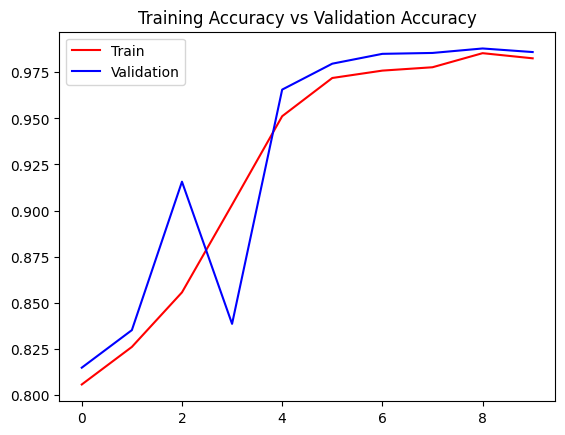

In [26]:
plt.title('Training Accuracy vs Validation Accuracy')

plt.plot(history.history['accuracy'], color='red',label='Train')
plt.plot(history.history['val_accuracy'], color='blue',label='Validation')

plt.legend()

# **Plotting the graph of Accuracy and Validation loss:**

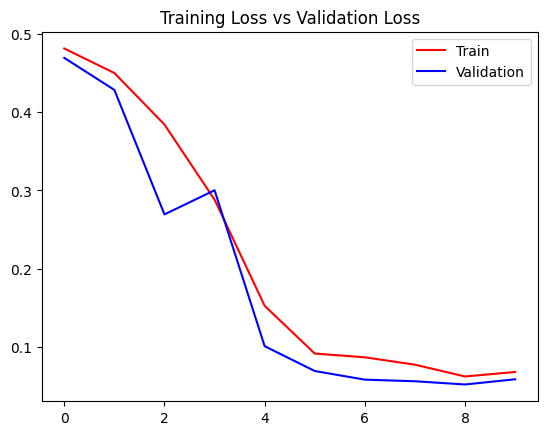

In [27]:
plt.title('Training Loss vs Validation Loss')

plt.plot(history.history['loss'], color='red',label='Train')
plt.plot(history.history['val_loss'], color='blue',label='Validation')

plt.legend()

# <a id="Import"></a>
# <p style="background-color: #FFC0CB; font-family: 'Copperplate'; color:#4B0082; font-size:140%; text-align:center; border-radius:1000px 10px;">7.0 The End</p> 